# Processamento Estatístico de Sinais - TI 0124 - Trabalho computacional 3

## Prof. Charles Casimiro Cavalcante, Dr.
## Wireless Telecommunications Research Group - GTEL
## Department of Teleinformatics Engineering - DETI
## Federal University of Ceará (UFC) - Brazil
## URL: [charlescasimiro.github.io](https://charlescasimiro.github.io/)


## Alunos:

- Paulo Ricardo Menezes Soares - 537440
- Pedro Leinos Falcão Cunha - 542114
- Kelvin Leandro Martins - 540006


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Estimação da matriz de autocorrelação

## 1. dado um conjunto de N medidas, denotadas por $\mathbf{x} = [ x_1 \ x_2 \ \cdots \ x_N]^T$, implementar um estimador da matriz de autocorrelação da sequência

### Carregar a sequência ou gerar a partir de uma distribuição

In [2]:
mu = 0
sigma = 1
N = 1000

while True:
  ans = input("Deseja carregar uma sequência? [S/N]: ")
  if ans.upper() == 'S':
    file_path = input("Digite o caminho do arquivo: ")
    # considerando que o sinal de entrada é .txt
    signal = np.loadtxt(file_path)
    break
  elif ans.upper() == 'N':
    signal = np.random.normal(mu, sigma, N)
    break
  else:
    print("Resposta inválida!")

Deseja carregar uma sequência? [S/N]: N


### Plotando o sinal e sua Distribuição

signal mean = -0.027339751871852294
signal std = 0.9873758090710826


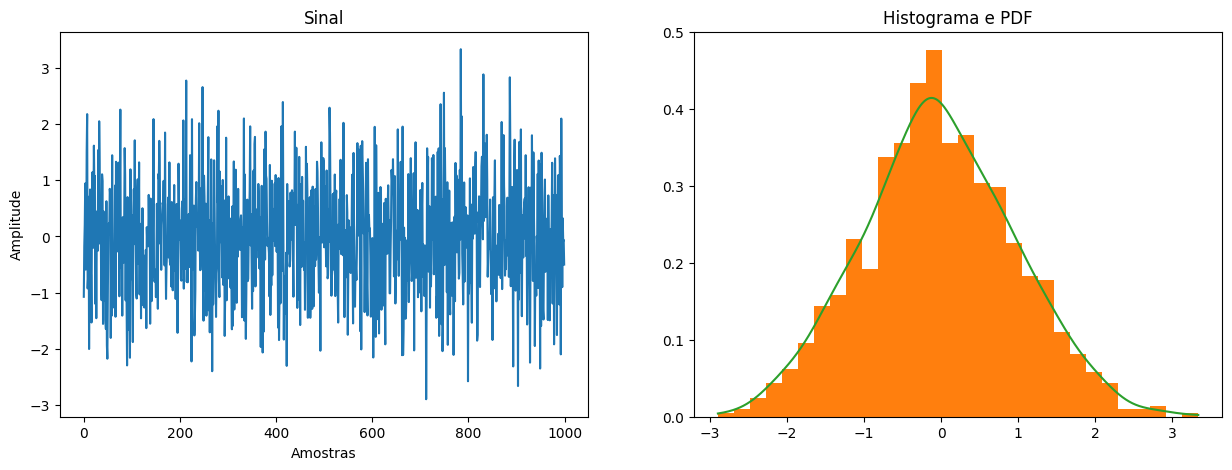

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
print(f'signal mean = {np.mean(signal)}')
print(f'signal std = {np.std(signal)}')
ax = ax.flatten()
ax[0].plot(signal)
ax[0].set_title("Sinal")
ax[0].set_xlabel("Amostras")
ax[0].set_ylabel("Amplitude")

count, bins, ignored = plt.hist(signal, 30, density=True)
pdf = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ) #para sinal normal

kde = gaussian_kde(signal)
x_vals = np.linspace(min(signal), max(signal), N)
pdf_vals = kde(x_vals)

# ax[1].plot(bins, pdf)
ax[1].hist(signal, bins=bins, density=True)
ax[1].plot(x_vals, pdf_vals)
ax[1].set_title("Histograma e PDF")
plt.show()

### **Matriz \($\boldsymbol{X}$\) (Método da Autocorrelação)**:
A matriz \( $\boldsymbol{X}$ \) é definida como:

$
\boldsymbol{X} =
\begin{bmatrix}
x[0] & 0 & \cdots & 0 \\
x[1] & x[0] & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
x[P-1] & x[P-2] & \cdots & x[0] \\
x[P] & x[P-1] & \cdots & x[1] \\
\vdots & \vdots & & \vdots \\
x[N_{s}-1] & x[N_{s}-2] & \cdots & x[N_{s}-P] \\
0 & x[N_{s}-1] & \cdots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & x[N_{s}-1]
\end{bmatrix}
$

### **Matriz \( $\hat{\mathbf{R}}_{x} $\) (Método da Autocorrelação)**:
A estimativa da matriz de correlação \( $\hat{\mathbf{R}}_{x} $\) é dada por:

$
\hat{\mathbf{R}}_{x} = \frac{1}{N_{s}} (\boldsymbol{X})^{*T} \boldsymbol{X}
$

E a estimativa da matriz de correlação cruzada \( $\hat{\mathbf{R}}_{xy} $\) (dado que $\boldsymbol{Y}$ é formado igual a $\boldsymbol{X}$) é dada por:

$
\hat{\mathbf{R}}_{xy} = \frac{1}{N_{s}} (\boldsymbol{Y})^{*T} \boldsymbol{X}
$

### **Matriz \( $\boldsymbol{X}^{\prime\prime} $\) (Método da Covariância)**:
A matriz \( $\boldsymbol{X}^{\prime\prime} $\) é definida como:

$
\boldsymbol{X}^{\prime\prime} =
\begin{bmatrix}
x[P-1] & x[P-2] & \cdots & x[0] \\
x[P] & x[P-1] & \cdots & x[1] \\
\vdots & \vdots & & \vdots \\
x[N_{s}-1] & x[N_{s}-2] & \cdots & x[N_{s}-P]
\end{bmatrix}
$

### **Matriz \( $\hat{\mathbf{R}}_{x}^{\prime\prime} $\) (Método da Covariância)**:
A estimativa da matriz de correlação \( $\hat{\mathbf{R}}_{x}^{\prime\prime} $\) é dada por:

$
\hat{\mathbf{R}}_{x}^{\prime\prime} = \frac{1}{N_{s} - P + 1} (\boldsymbol{X}^{\prime\prime})^{*T} \boldsymbol{X}^{\prime\prime}
$

E a estimativa da matriz de correlação cruzada \( $\hat{\mathbf{R}}_{xy}^{\prime\prime} $\) (dado que $\boldsymbol{Y}^{\prime\prime}$ é formado igual a $\boldsymbol{X}^{\prime\prime}$) é dada por:

$
\hat{\mathbf{R}}_{xy}^{\prime\prime} = \frac{1}{N_{s} - P + 1} (\boldsymbol{Y}^{\prime\prime})^{*T} \boldsymbol{X}^{\prime\prime}
$

In [4]:
from numpy.lib.stride_tricks import sliding_window_view

def correlation_matrix(x, y=None, P=None, method='covariance'):
    if method not in {'covariance', 'autocorrelation'}:
        raise ValueError("The method must be 'autocorrelation' ou 'covariance'.")

    if y is None:
        y=x

    assert len(x) == len(y), "x and y must have the same lenght"

    Ns = len(x)

    if method=='autocorrelation':
        if P is None:
            P=Ns

        x_padded = np.pad(x, (P-1, P-1), mode='constant', constant_values=0)
        y_padded = np.pad(y, (P-1, P-1), mode='constant', constant_values=0)

        X = sliding_window_view(x_padded[::-1], window_shape=P)[::-1]
        Y = sliding_window_view(y_padded[::-1], window_shape=P)[::-1]

        return 1/Ns * Y.T @ X


    elif method=='covariance':
        if P is None:
            P=Ns//2

        X = sliding_window_view(x[::-1],window_shape=P)[::-1]
        Y = sliding_window_view(y[::-1],window_shape=P)[::-1]

        return 1/(Ns-P+1) * Y.T @ X


Rx = correlation_matrix(signal, P=100, method='autocorrelation')
Rx1 = correlation_matrix(signal, P=100, method='covariance')

# Algoritmo EM

## 1. seja o conjunto de dados fornecido no arquivo do seguinte [link](https://www.dropbox.com/scl/fi/ix06wdp0b7zmicmkwikv8/2d-em.csv?rlkey=zfeghhuflod4wgl4av3cs7x8o&e=1&st=mphfxbws&dl=0)

### Importando os dados

In [5]:
!wget wget "https://www.dropbox.com/scl/fi/ix06wdp0b7zmicmkwikv8/2d-em.csv?rlkey=zfeghhuflod4wgl4av3cs7x8o&e=1&st=w77yjce0&dl=1" -O 2d-em.csv

--2025-02-12 16:34:19--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-02-12 16:34:19--  https://www.dropbox.com/scl/fi/ix06wdp0b7zmicmkwikv8/2d-em.csv?rlkey=zfeghhuflod4wgl4av3cs7x8o&e=1&st=w77yjce0&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce4a0c5350697f007eb40458777.dl.dropboxusercontent.com/cd/0/inline/Cj8By_LzM_5SppSdaLm2-tT3aAw7-g6F2GBal_kcFkvxEi5aVTcp5nfNUwkrN1bwDUINZp5kqFX1GzBr9fIhsg7UO1418-L2GMKHgvupZGDIqmBkFfPJg4aco_hRS2YCAwo/file?dl=1# [following]
--2025-02-12 16:34:20--  https://uce4a0c5350697f007eb40458777.dl.dropboxusercontent.com/cd/0/inline/Cj8By_LzM_5SppSdaLm2-tT3aAw7-g6F2GBal_kcFkvxEi5aVTcp5nfNUwkrN1bwDUINZp5kqFX1GzBr9fIhsg7UO1418-L2GMKHgvupZGDIqmBkFfPJg4aco_hRS2YCAwo/file?dl=1
Resolving uce4

In [6]:
df = pd.read_csv('2d-em.csv', header=None)
df.head(15)

,0,1
0,-2.761410,-3.112991
1,4.007363,3.715906
2,2.492739,2.506346
3,1.218215,0.826689
4,-1.266938,-1.153239
5,2.928280,3.116988
6,-2.952492,-2.679652
7,-1.201038,0.002646
8,1.510646,1.299601
9,0.969209,-0.002195


### Visualizando os Dados

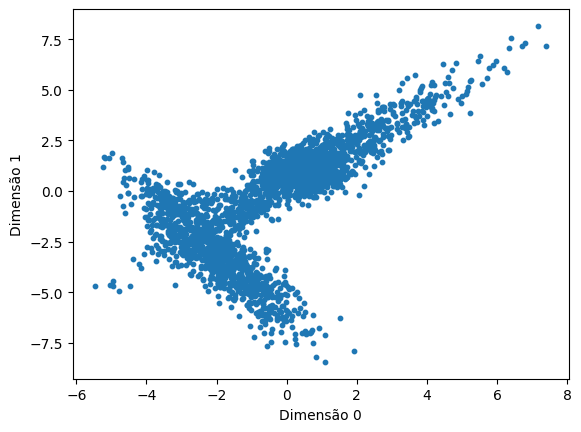

In [7]:
plt.scatter(df[0], df[1], s=10)
plt.xlabel("Dimensão 0")
plt.ylabel("Dimensão 1")
plt.pause(0.1)

## 2. implementar o algoritmo EM para fazer a estimação dos clusters.

1. **Inicializar** as médias  $\mu_k$, as covariâncias $\Sigma_k$, e os coeficientes de misturas $\pi_k$, e avaliar o valor inicial da verossimilhança logarítmica.


2. **E step.** Avaliar as responsabilidades usando os valores atuais dos parâmetros:

$$
\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}
{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}
$$

3. **M step.** Restimar os parâmetros usando as responsabilidades atuais:

$$
\mu_k^{\text{new}} = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) x_n
$$

$$
\Sigma_k^{\text{new}} = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_k^{\text{new}})(x_n - \mu_k^{\text{new}})^\top
$$

$$
\pi_k^{\text{new}} = \frac{N_k}{N}
$$

$$
N_k = \sum_{n=1}^{N} \gamma(z_{nk}).
$$

4. **Avaliar o log da verossimilhança:**

$$
\ln p(\mathbf{X} | \boldsymbol{\mu}, \boldsymbol{\Sigma}, \boldsymbol{\pi}) =
\sum_{n=1}^{N} \ln \left\{ \sum_{k=1}^{K} \pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k) \right\}
$$

e verificar a convergência dos parâmetros ou da verossimilhança logarítmica. Se o critério de convergência não for satisfeito, retornar à etapa 2.

### Calcular PDF de uma Normal multivariada

$$
\mathcal{N}(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) =
\frac{1}{(2\pi)^{D/2}} \frac{1}{|\boldsymbol{\Sigma}|^{1/2}}
\exp \left\{ -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top
\boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right\}
$$


In [8]:
def multivariate_gaussian_pdf(X, mu, Sigma):
  n ,d = X.shape
  const = 1/((2*np.pi)**(d/2) * np.sqrt(np.linalg.det(Sigma)))
  exp = -0.5 * np.sum((X - mu) @ np.linalg.inv(Sigma) * (X-mu), axis=1)

  return const * np.exp(exp)

### Calcular Matriz de Covariância entre as 2 dimensões dos Dados

$$
\Sigma = \begin{bmatrix}
\text{Var}(\mathbf{x}) & \text{Cov}(\mathbf{x}, \mathbf{y}) \\
\text{Cov}(\mathbf{y}, \mathbf{x}) & \text{Var}(\mathbf{y})
\end{bmatrix}
$$

Onde,

$$
\text{Cov}(\mathbf{x}, \mathbf{y}) = \text{Cov}(\mathbf{y}, \mathbf{x}) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$




In [9]:
def get_cov_matrix(df):
    df_array = np.array(df)
    n, d = df_array.shape
    mu = np.mean(df_array, axis=0)
    X = df_array - mu

    return (X.T @ X)/(n-1)

In [10]:
def e_step(X, means, covariances, weights):
    n = X.shape[0]
    k = len(means)
    responsabilities = np.zeros((n, k))

    for i in range(k):
        responsabilities[:, i] = weights[i] * multivariate_gaussian_pdf(X, mu=means[i], Sigma=covariances[i])

    responsabilities /= np.sum(responsabilities, axis=1, keepdims=True)
    return responsabilities


In [11]:
def m_step(X, responsibilities, epsilon=1e-6):
    n, d = X.shape
    k = responsibilities.shape[1]

    Nk = responsibilities.sum(axis=0)
    weights = Nk / n

    means = np.zeros((k, d))
    for i in range(k):
        means[i] = np.sum(responsibilities[:, i][:, np.newaxis] * X, axis=0) / Nk[i]

    covariances = np.zeros((k, d, d))
    for i in range(k):
        diff = X - means[i]
        covariances[i] = (responsibilities[:, i][:, np.newaxis] * diff).T @ diff / Nk[i]

        covariances[i] += epsilon * np.eye(d)

    return means, covariances, weights

In [12]:
def plot_gaussian_ellipse(mean, cov, color):
    ax = plt.gca() #get current axes
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    order = np.argsort(eigenvalues)[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]

    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    width, height = 2 * np.sqrt(eigenvalues)

    from matplotlib.patches import Ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=np.degrees(angle),
                      edgecolor=color, facecolor='none', linewidth=2)
    ax.add_patch(ellipse)

In [18]:
def em_algorithm(X, k, max_iter=100, tol=1e-2):
    n, d = X.shape

    np.random.seed(42)
    indexes = np.random.permutation(n)
    clusters = np.array_split(indexes, k)

    means = np.array([np.mean(X[cluster], axis=0) for cluster in clusters])
    covariances = np.array([get_cov_matrix(X[cluster]) for cluster in clusters])
    weights = np.ones(k)/k

    fig, ax = plt.subplots()

    for iteration in range(max_iter):
        responsibilities = e_step(X, means, covariances, weights)
        means_new, covariances_new, weights_new = m_step(X, responsibilities)

        if iteration > 0 and np.linalg.norm(means_new - means) < tol:
            break

        means, covariances, weights = means_new, covariances_new, weights_new

        colors = ['red', 'blue']
        labels = ['Classe 0', 'Classe 1']

        scatter = plt.scatter(X[:, 0], X[:, 1], c=responsibilities.argmax(axis=1), cmap='coolwarm', s=10, alpha=0.3)

        for i, color in enumerate(colors):
            plt.scatter(means[i, 0], means[i, 1], marker='x', s=50, color=color, label=f'Média {i+1}')
            plot_gaussian_ellipse(means[i], covariances[i], color)

        handles, _ = scatter.legend_elements()
        legend_elements = handles + [plt.Line2D([0], [0], marker='x', color=color, markersize=10, linestyle='', label=f'Média {i+1}') for i, color in enumerate(colors)]
        legend_labels = labels + [f'Média {i+1}' for i in range(len(colors))]

        plt.xlabel("Dimensão 1")
        plt.ylabel("Dimensão 2")
        plt.title(f"Iteração {iteration+1} - EM")

        plt.legend(legend_elements, legend_labels)

        filename = f'frame_{iteration}.png'

        plt.grid()
        plt.tight_layout()
        plt.savefig(filename)


        plt.draw()
        plt.pause(0.1)


    plt.show()

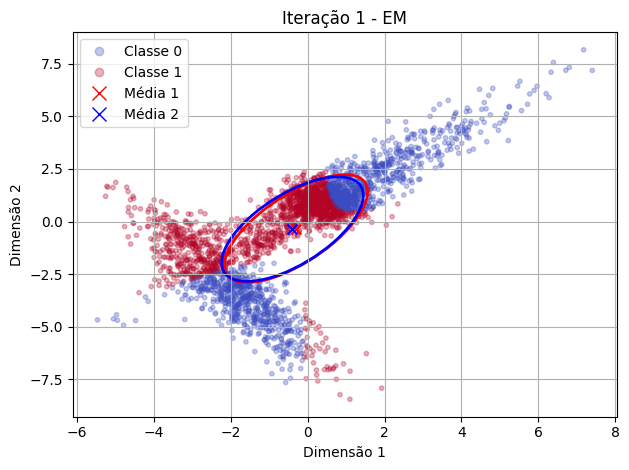

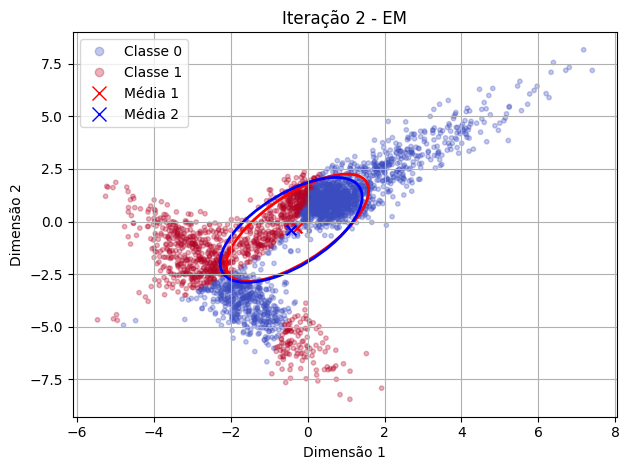

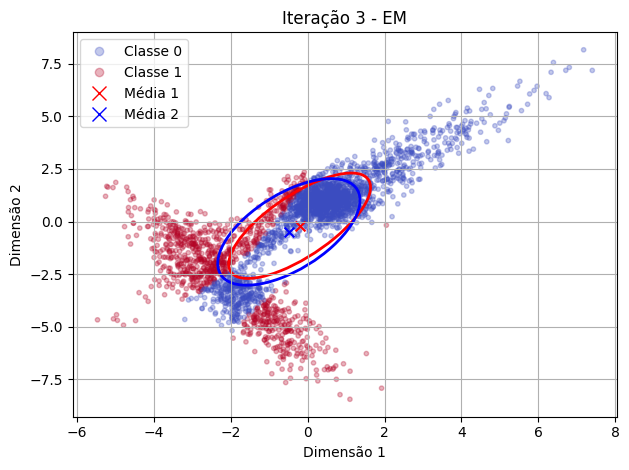

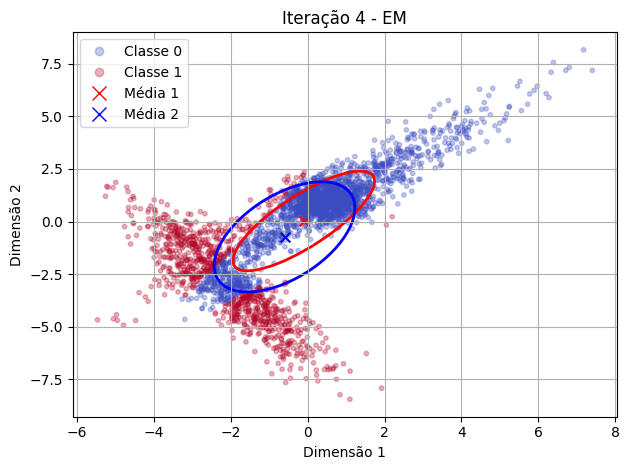

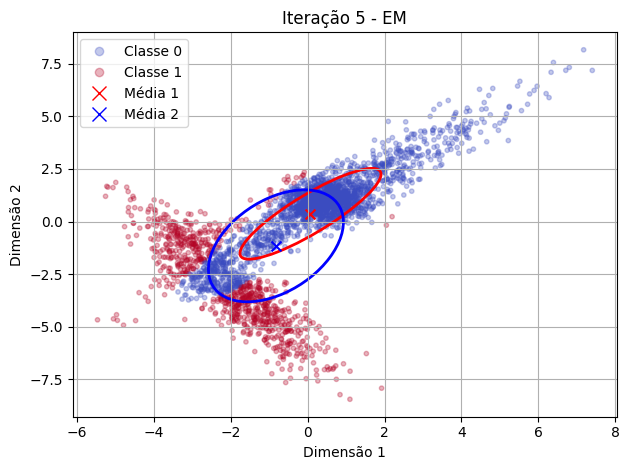

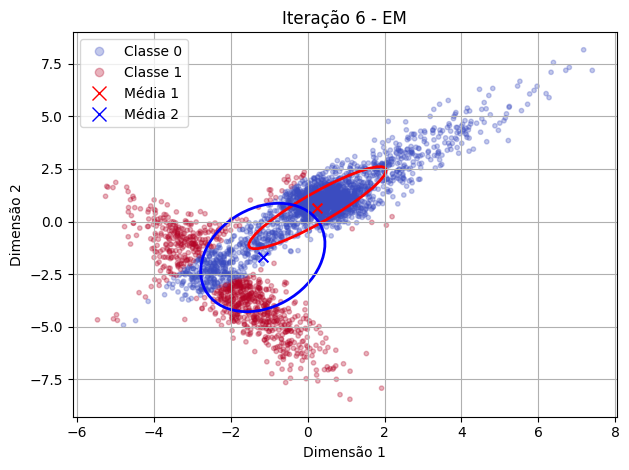

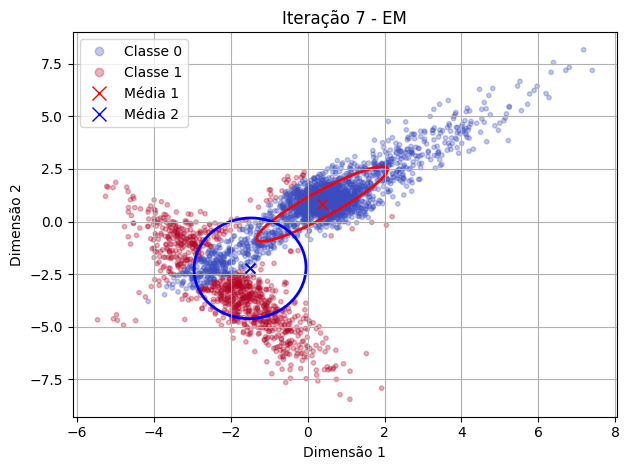

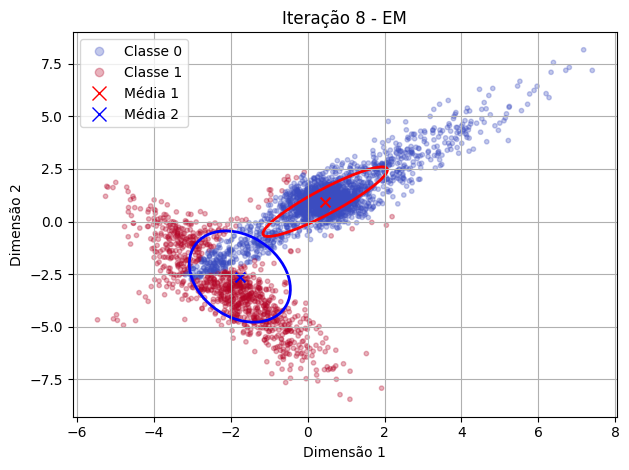

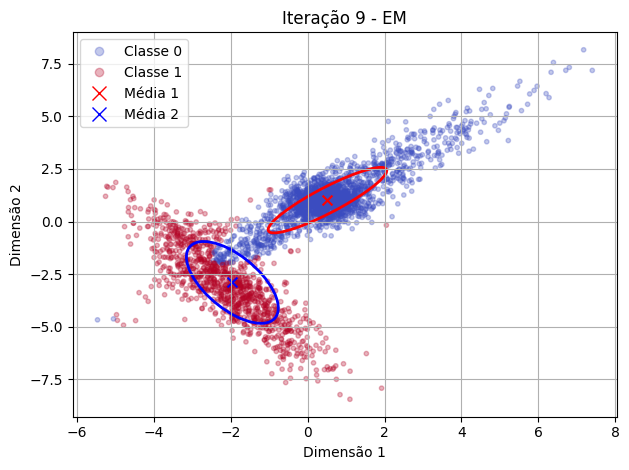

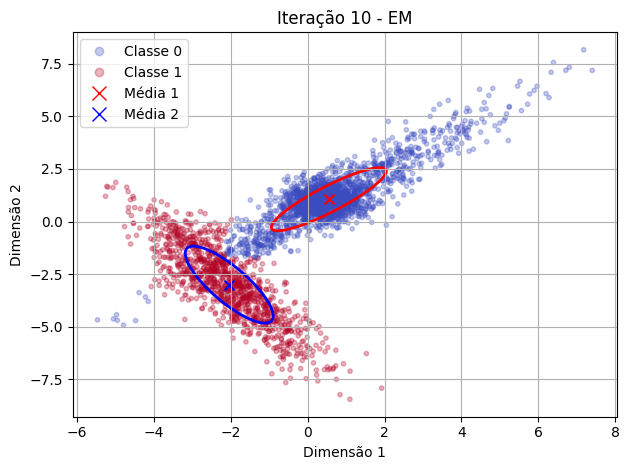

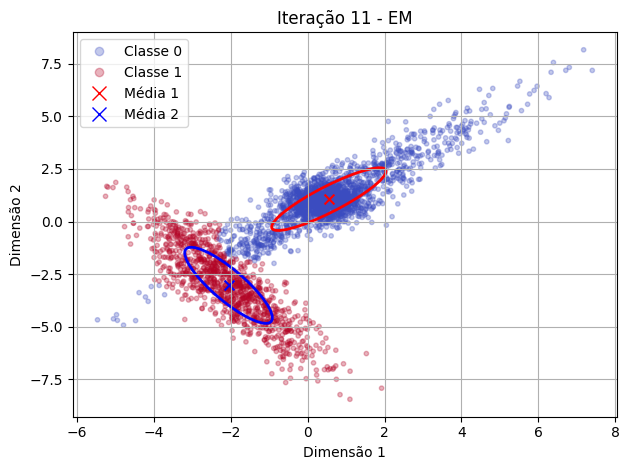

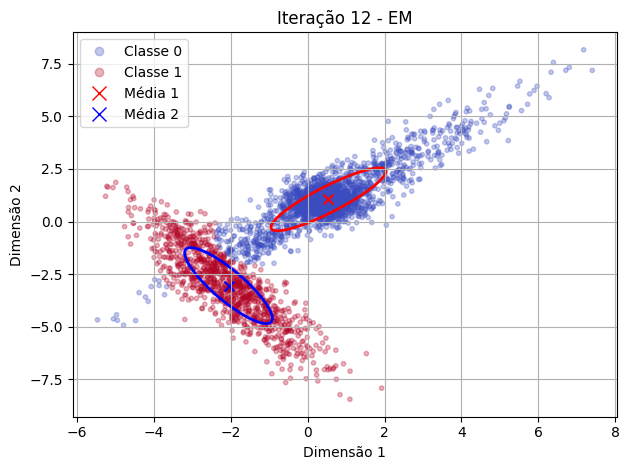

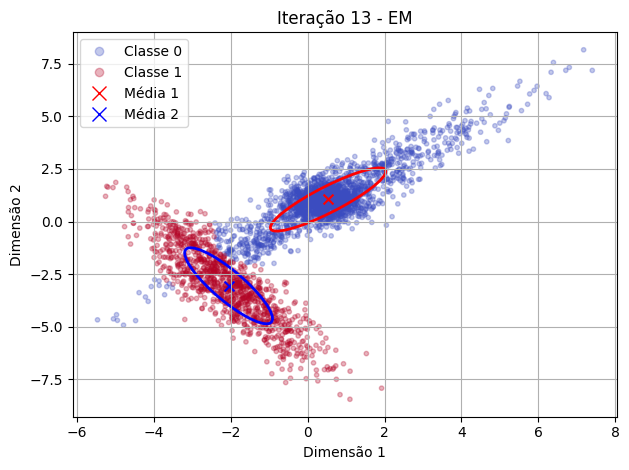

In [19]:
em_algorithm(np.array(df), k=2)

In [ ]:
# #save gif

# from PIL import Image
# import os

# diretorio = 'frames'

# imagens = [f for f in os.listdir(diretorio) if f.endswith('.png')]
# imagens.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))

# imagens_pil = [Image.open(os.path.join(diretorio, imagem)) for imagem in imagens]

# imagens_pil[0].save('em.gif', save_all=True, append_images=imagens_pil[1:], duration=360, loop=0)


![em](https://drive.google.com/uc?id=1qUFv5iYSgDZ9WtiIVn2dOw2ikJ2wgcwF)